In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/data.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Data Cleaning - EDA

In [7]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

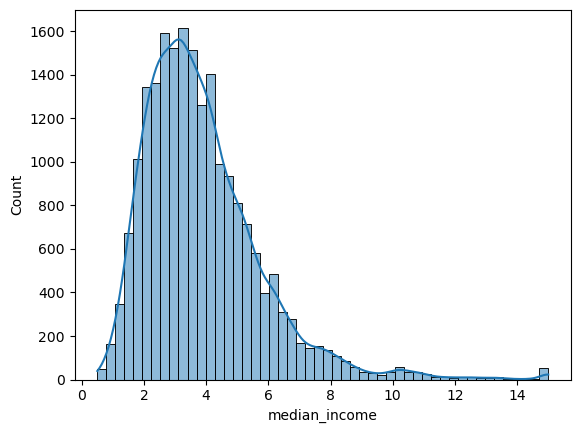

In [9]:
sns.histplot(data = df, x = 'median_income',bins = 50, kde = True)
plt.show()

In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
# import math

# def plot_all_histograms(df, title_prefix=""):
#     num_cols = df.select_dtypes(include=[np.number]).columns
#     n_cols = 3
#     n_rows = math.ceil(len(num_cols) / n_cols)

#     fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

#     for i, col in enumerate(num_cols):
#         row = i // n_cols
#         col_idx = i % n_cols

#         sns.histplot(df[col], kde=True, bins=30, ax=ax[row, col_idx], color="skyblue")
#         ax[row, col_idx].set_title(f"{title_prefix} - {col}")
#         ax[row, col_idx].set_xlabel("")
#         ax[row, col_idx].set_ylabel("")

#     for j in range(i+1, n_rows * n_cols):
#         fig.delaxes(ax.flatten()[j])

#     plt.tight_layout(pad=3)
#     plt.show()

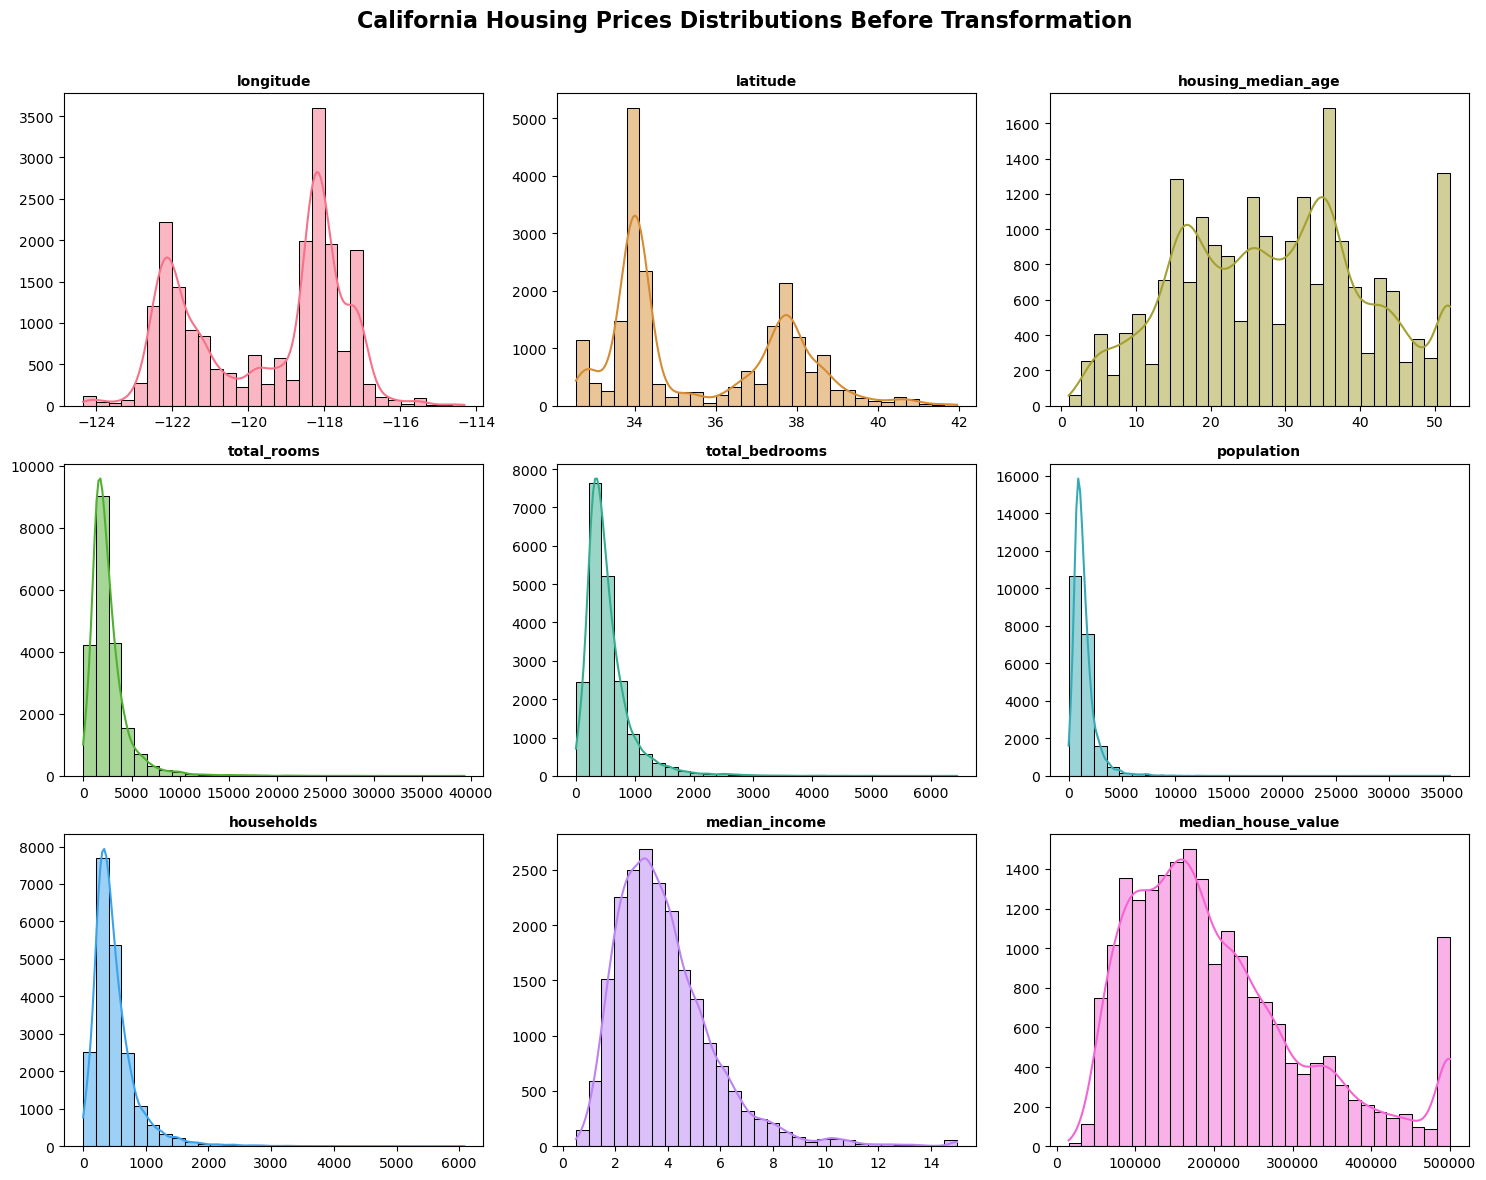

In [12]:
import warnings
warnings.filterwarnings('ignore')

columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
colors = sns.color_palette("husl", len(columns))

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('California Housing Prices Distributions Before Transformation', fontsize=16, fontweight='bold')

for i, col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    sns.histplot(data=df, x=col, ax=ax, kde=True, color= colors[i],bins = 30, edgecolor='black')
    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')        

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("images/distributions_before_transformation.png", dpi=120, bbox_inches='tight')
plt.show()

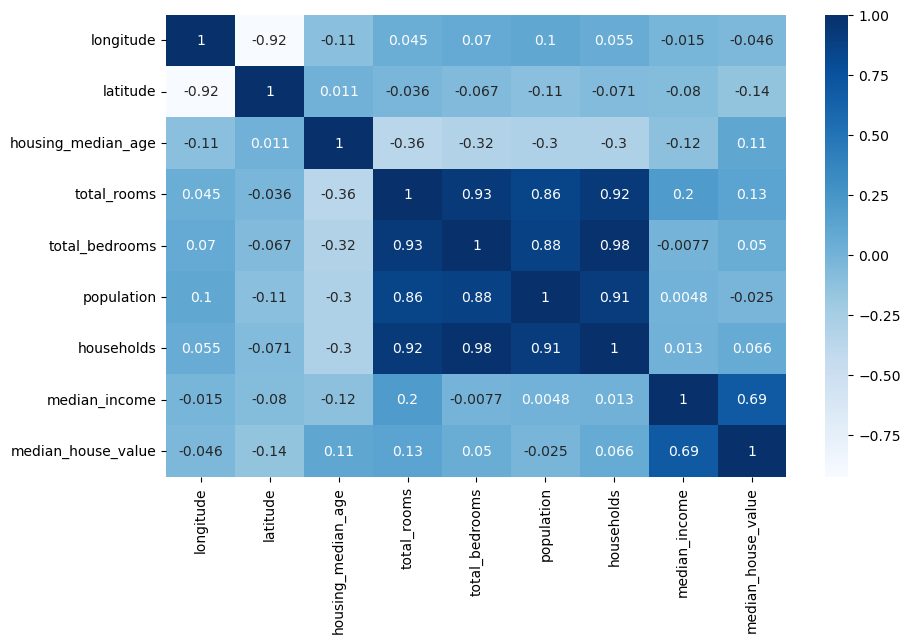

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only= True),annot = True, cmap = 'Blues')
plt.show()

In [14]:
def find_outliers_iqr(df, threshold = 1.5):
    outlier_summary = {}

    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[ (df[col] < lower_bound) | (df[col] > upper_bound)]
        
        outlier_summary[col] = {
            "outlier_count" : outliers.shape[0],
            "outlier_percentage" : 100 * outliers.shape[0] / df.shape[0],
            "lower_bound" : lower_bound,
            "upper_bound" : upper_bound
        }
    return pd.DataFrame(outlier_summary)

In [15]:
find_outliers_iqr(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
outlier_count,0.000,0.00,0.0,1287.000000,1271.000000,1196.000000,1220.000000,681.000000,1071.000000
outlier_percentage,0.000,0.00,0.0,6.235465,6.157946,5.794574,5.910853,3.299419,5.188953
lower_bound,-127.485,28.26,-10.5,-1102.625000,-230.500000,-620.000000,-207.500000,-0.706375,-98087.500000
upper_bound,-112.325,43.38,65.5,5698.375000,1173.500000,3132.000000,1092.500000,8.013025,482412.500000


In [16]:
def remove_outliers_from_column(df, target_col, threshold = 1.5):
    Q1 = df[target_col].quantile(0.25)
    Q3 = df[target_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    return df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]

In [17]:
def remove_outliers_from_all_columns(df, threshold = 1.5):
    df_clean = df.copy()
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_clean = df_clean[ (df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean.copy()

In [18]:
print("original data shape: ", df.shape)
df_target_clean = remove_outliers_from_column(df, "median_house_value")
print("only target column cleaning shape: ", df_target_clean.shape)
df_all_clean = remove_outliers_from_all_columns(df)
print("all columns cleaning shape: ", df_all_clean.shape)

original data shape:  (20640, 10)
only target column cleaning shape:  (19569, 10)
all columns cleaning shape:  (17446, 10)


In [19]:
df_target_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19569 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19569 non-null  float64
 1   latitude            19569 non-null  float64
 2   housing_median_age  19569 non-null  float64
 3   total_rooms         19569 non-null  float64
 4   total_bedrooms      19369 non-null  float64
 5   population          19569 non-null  float64
 6   households          19569 non-null  float64
 7   median_income       19569 non-null  float64
 8   median_house_value  19569 non-null  float64
 9   ocean_proximity     19569 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
df_target_clean.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [21]:
df_target_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19569.000000,19569.000000,19569.000000,19569.000000,19369.000000,19569.000000,19569.000000,19569.000000,19569.000000
mean,-119.562786,35.654159,28.352752,2619.977260,539.893335,1442.788952,501.394859,3.665568,190852.301906
std,2.005764,2.151007,12.497772,2183.419302,422.650225,1145.011369,383.396308,1.557927,95438.555669
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,297.000000,797.000000,282.000000,2.522700,116200.000000
50%,-118.510000,34.270000,28.000000,2110.000000,437.000000,1181.000000,411.000000,3.441200,173200.000000
75%,-117.990000,37.730000,37.000000,3123.000000,648.000000,1749.000000,606.000000,4.572100,246700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,482200.000000


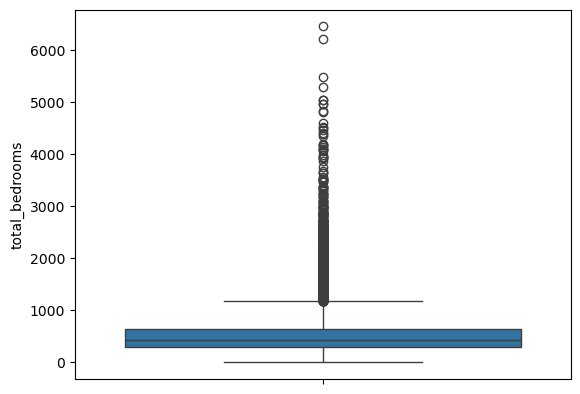

In [22]:
sns.boxplot(df_target_clean['total_bedrooms'])
plt.show()

### We have so many outlier values in 'total_bedrooms' column, I decided to replace the missing values ​​with the median value.

In [24]:
df_target_clean['total_bedrooms'] = df_target_clean['total_bedrooms'].fillna(df_target_clean['total_bedrooms'].median())

In [25]:
df_target_clean.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [26]:
df_target_clean['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8552
INLAND        6519
NEAR OCEAN    2419
NEAR BAY      2074
ISLAND           5
Name: count, dtype: int64

### The values do not have a specific logic order and there are not many values, I decided to do one-hot encoding.

In [28]:
df_target_clean = pd.get_dummies(
    df_target_clean,
    columns=['ocean_proximity'],   
    #prefix='ocean',               
    drop_first=True,              
    dtype=int                     
)

In [29]:
df_target_clean.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,0,0,0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,1,0,0,0


# Training - XGBRegressor & Other Regression Models

In [31]:
X = df_target_clean.drop('median_house_value', axis = 1)
y = df_target_clean['median_house_value']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 15)

In [33]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [34]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [35]:
def evaluate_model(true, predicted):
    mea = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mea, mse, rmse, r2_square

In [36]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "ElasticNet" : ElasticNet(),
    "K Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor(),
    "Gradient Boost Regressor" : GradientBoostingRegressor(),
    "XGBoost Regressor" : XGBRegressor()
}

In [37]:
results = []

for name, model in models.items():
    try:
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred  = model.predict(X_test)

        train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
        test_mae,  test_mse,  test_rmse,  test_r2  = evaluate_model(y_test,  y_test_pred)

        print(f"\n{name}")
        print("-" * max(30, len(name)))
        print("Model performance for Training Set")
        print(f"MAE: {train_mae:.4f} | MSE: {train_mse:.4f} | RMSE: {train_rmse:.4f} | R²: {train_r2:.4f}")
        print("Model performance for Test Set")
        print(f"MAE: {test_mae:.4f}  | MSE: {test_mse:.4f}  | RMSE: {test_rmse:.4f}  | R²: {test_r2:.4f}")

        results.append({
            "model": name,
            "train_MAE": train_mae, "train_MSE": train_mse, "train_RMSE": train_rmse, "train_R2": train_r2,
            "test_MAE":  test_mae,  "test_MSE":  test_mse,  "test_RMSE":  test_rmse,  "test_R2":  test_r2,
            "rmse_gap":  test_rmse - train_rmse,   # overfit/underfit sinyali
            "r2_gap":    train_r2 - test_r2
        })

    except Exception as e:
        print(f"{name}: Error -> {e}")

summary_df = pd.DataFrame(results).sort_values("test_R2", ascending=False).reset_index(drop=True)
summary_df


Linear Regression
------------------------------
Model performance for Training Set
MAE: 43858.3875 | MSE: 3525640708.5348 | RMSE: 59377.1059 | R²: 0.6104
Model performance for Test Set
MAE: 43594.3639  | MSE: 3453859684.8388  | RMSE: 58769.5473  | R²: 0.6263

Lasso
------------------------------
Model performance for Training Set
MAE: 43859.0086 | MSE: 3525645308.9914 | RMSE: 59377.1447 | R²: 0.6104
Model performance for Test Set
MAE: 43594.6688  | MSE: 3453732161.6263  | RMSE: 58768.4623  | R²: 0.6263

Ridge
------------------------------
Model performance for Training Set
MAE: 43864.6773 | MSE: 3526123193.8111 | RMSE: 59381.1687 | R²: 0.6104
Model performance for Test Set
MAE: 43597.1429  | MSE: 3453203142.7388  | RMSE: 58763.9613  | R²: 0.6264

ElasticNet
------------------------------
Model performance for Training Set
MAE: 47301.4458 | MSE: 3918710291.0819 | RMSE: 62599.6030 | R²: 0.5670
Model performance for Test Set
MAE: 47204.3706  | MSE: 3864613279.7501  | RMSE: 62166.0139  

,model,train_MAE,train_MSE,train_RMSE,train_R2,test_MAE,test_MSE,test_RMSE,test_R2,rmse_gap,r2_gap
0,XGBoost Regressor,17501.127481,5.953779e+08,24400.366805,0.934212,28663.591162,1.782660e+09,42221.553326,0.807135,17821.186521,0.127076
1,Random Forest Regressor,11016.714709,2.678911e+08,16367.379583,0.970399,29677.891134,1.908278e+09,43683.837330,0.793545,27316.457747,0.176854
2,Gradient Boost Regressor,33890.098914,2.242966e+09,47359.963614,0.752157,35156.614000,2.430085e+09,49295.892480,0.737091,1935.928866,0.015066
3,Ridge,43864.677315,3.526123e+09,59381.168680,0.610370,43597.142912,3.453203e+09,58763.961258,0.626401,-617.207422,-0.016030
4,Lasso,43859.008585,3.525645e+09,59377.144669,0.610423,43594.668780,3.453732e+09,58768.462304,0.626343,-608.682364,-0.015920
5,Linear Regression,43858.387482,3.525641e+09,59377.105929,0.610424,43594.363863,3.453860e+09,58769.547257,0.626330,-607.558672,-0.015906
6,Decision Tree,0.000000,0.000000e+00,0.000000,1.000000,41501.703628,3.834001e+09,61919.309601,0.585202,61919.309601,0.414798
7,ElasticNet,47301.445795,3.918710e+09,62599.602963,0.566990,47204.370627,3.864613e+09,62166.013864,0.581891,-433.589099,-0.014900
8,Adaboost Regressor,66493.635603,5.912142e+09,76890.453345,0.346720,66428.598108,5.988259e+09,77383.839304,0.352135,493.385959,-0.005415
9,K Neighbors Regressor,56469.600219,5.210333e+09,72182.637452,0.424268,69873.333504,7.837536e+09,88529.857964,0.152063,16347.220512,0.272205


# Hyperparameter Tuning with XGBRegressor

In [39]:
xgboost_params = {
        "learning_rate" : [0.1, 0.01],
        "max_depth" : [5,8,12,20,30],
        "n_estimators" : [100,200,300,500],
        "colsample_bytree" : [0.3, 0.4, 0.5, 0.7, 1]
}

In [40]:
from sklearn.model_selection import RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=XGBRegressor(),
                                   param_distributions=xgboost_params,
                                   cv = 5,
                                   n_jobs = -1,
                                   scoring = 'r2',
                                   verbose = 1)

In [41]:
randomized_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                                                             1],
                                        'learning_rate': [0.1, 0.01],
                                        'max_depth': [5, 8, 12, 20, 30],
                                        'n_estimators': [100, 200, 300, 500]},
                   scoring='r2', verbose=1)

In [42]:
randomized_cv.best_params_

{'n_estimators': 500,
 'max_depth': 20,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7}

In [43]:
model = XGBRegressor(n_estimators = 500,
 max_depth = 6,
 learning_rate = 0.1,
 colsample_bytree = 0.7)

In [44]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [45]:
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
test_mae,  test_mse,  test_rmse,  test_r2  = evaluate_model(y_test,  y_test_pred)

print(f"\n{name}")
print("-" * max(30, len(name)))
print("Model performance for Training Set")
print(f"MAE: {train_mae:.4f} | MSE: {train_mse:.4f} | RMSE: {train_rmse:.4f} | R²: {train_r2:.4f}")
print("Model performance for Test Set")
print(f"MAE: {test_mae:.4f}  | MSE: {test_mse:.4f}  | RMSE: {test_rmse:.4f}  | R²: {test_r2:.4f}")


XGBoost Regressor
------------------------------
Model performance for Training Set
MAE: 13746.0241 | MSE: 372031378.1480 | RMSE: 19288.1149 | R²: 0.9589
Model performance for Test Set
MAE: 27896.1226  | MSE: 1687273912.9771  | RMSE: 41076.4399  | R²: 0.8175


# Training - LightGBM Regressor

In [47]:
from lightgbm import LGBMRegressor

In [48]:
model = LGBMRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
test_mae,  test_mse,  test_rmse,  test_r2  = evaluate_model(y_test, y_pred)
print(f"MAE: {test_mae:.4f}  | MSE: {test_mse:.4f}  | RMSE: {test_rmse:.4f}  | R²: {test_r2:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1844
[LightGBM] [Info] Number of data points in the train set: 13698, number of used features: 11
[LightGBM] [Info] Start training from score 190578.120602
MAE: 29221.3019  | MSE: 1804593486.3209  | RMSE: 42480.5071  | R²: 0.8048


# Hyperparameter Tuning with LGBMRegressor

In [50]:
param_grid = {
    "num_leaves" : [31, 50, 70],
    "max_depth" : [-1, 5, 10],
    "learning_rate" : [0.01, 0.05, 0.1],
    "n_estimators" : [100, 300, 1000],
    "min_child_samples" : [10,20,30],
    "subsample" : [0.6, 0.8, 1.0],
    "colsample_bytree" : [0.6, 0.8, 1.0],
    "reg_alpha" : [0, 0.5, 1.0],
    "reg_lambda" : [0, 0.5, 1.0]
}

In [51]:
random_search = RandomizedSearchCV(
    estimator=LGBMRegressor(verbosity=-1),
    param_distributions=param_grid,
    cv=5,
    verbose=0,
    random_state=15,
    scoring="r2",
    n_jobs = -1
)

In [52]:
import warnings
warnings.filterwarnings("ignore")
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(verbosity=-1), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [-1, 5, 10],
                                        'min_child_samples': [10, 20, 30],
                                        'n_estimators': [100, 300, 1000],
                                        'num_leaves': [31, 50, 70],
                                        'reg_alpha': [0, 0.5, 1.0],
                                        'reg_lambda': [0, 0.5, 1.0],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=15, scoring='r2')

In [53]:
random_search.best_params_

{'subsample': 0.8,
 'reg_lambda': 0,
 'reg_alpha': 1.0,
 'num_leaves': 70,
 'n_estimators': 300,
 'min_child_samples': 20,
 'max_depth': 10,
 'learning_rate': 0.1,
 'colsample_bytree': 0.6}

In [54]:
y_pred = random_search.predict(X_test)
test_mae,  test_mse,  test_rmse,  test_r2  = evaluate_model(y_test, y_pred)
print(f"MAE: {test_mae:.4f}  | MSE: {test_mse:.4f}  | RMSE: {test_rmse:.4f}  | R²: {test_r2:.4f}")

MAE: 27291.0784  | MSE: 1637472407.7401  | RMSE: 40465.6942  | R²: 0.8228


# Transformation w/ PowerTransformer

In [56]:
df_target_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


### The dataset contained negative values in the independent variables, I decided to use 'yeo-johnson' as the converter.

## Yeo-Johnson Transformer for Independent Variables

In [59]:
from sklearn.preprocessing import PowerTransformer

In [60]:
pt_X = PowerTransformer(method="yeo-johnson")

X_train_transformed = pt_X.fit_transform(X_train)
X_test_transformed = pt_X.transform(X_test)

In [61]:
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns = X_train.columns)

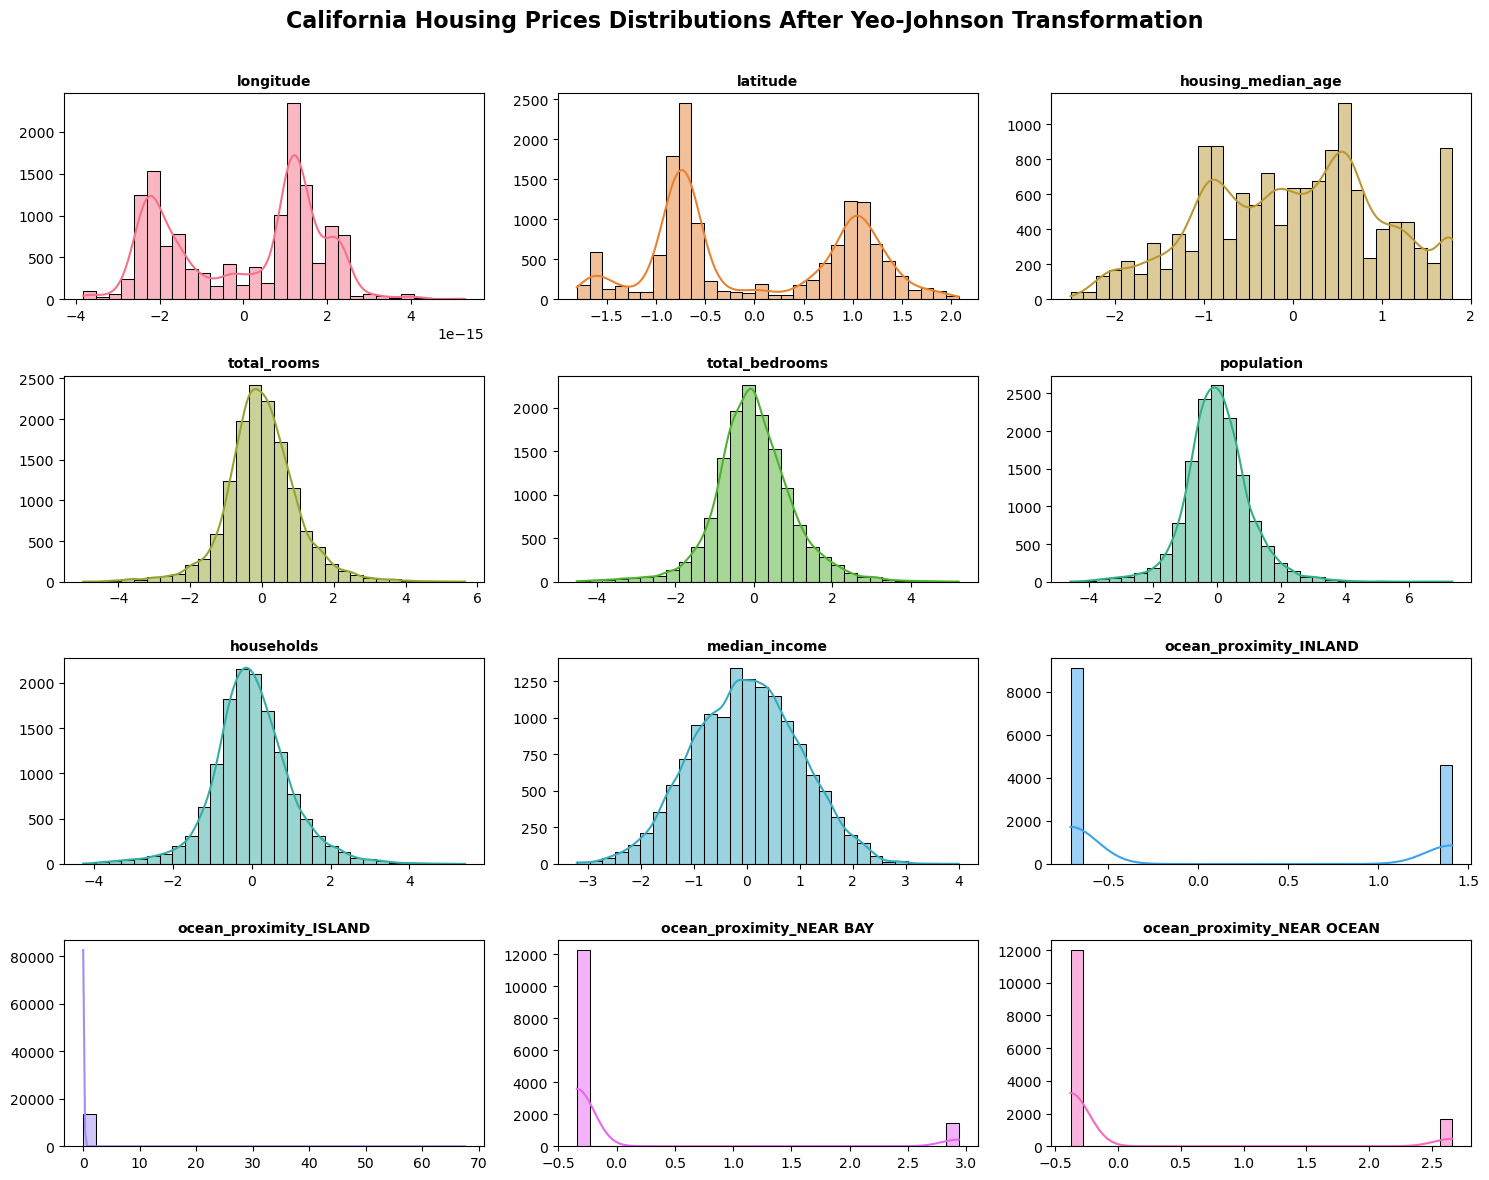

In [62]:
import warnings
warnings.filterwarnings('ignore')

columns = X_train_transformed_df.columns
colors = sns.color_palette("husl", len(columns))

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('California Housing Prices Distributions After Yeo-Johnson Transformation', fontsize=16, fontweight='bold')

for i, col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    sns.histplot(data=X_train_transformed_df, x=col, ax=ax, kde=True, color= colors[i],bins = 30, edgecolor='black')
    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')        

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("images/distributions_after_transformation.png", dpi=120, bbox_inches='tight')
plt.show()

In [63]:
df_target_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


### Dependent variables contained positive values, I decided to use 'box-cox' as the converter.

## Box-Cox Transformer for Dependent Variables

In [66]:
from scipy.stats import boxcox
y_train_transformed, lambda_y = boxcox(y_train)

### Creating a model, the target variable is a transformed value with 'box-cox', we need to return it to its original state to make a prediction.

In [68]:
def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.power(y * lambda_ + 1, 1 / lambda_)

## Training XGBRegressor w/ default parameters

In [70]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train_transformed, y_train_transformed)

y_pred_transformed = model_xgb.predict(X_test_transformed)
y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)

test_mae,  test_mse,  test_rmse,  test_r2  = evaluate_model(y_test, y_pred_original)
print(f"MAE: {test_mae:.4f}  | MSE: {test_mse:.4f}  | RMSE: {test_rmse:.4f}  | R²: {test_r2:.4f}")

MAE: 28214.2030  | MSE: 1814984122.5112  | RMSE: 42602.6305  | R²: 0.8036


## Training LightGBMRegressor w/ default parameters

In [72]:
model_lgbm = LGBMRegressor()
model_lgbm.fit(X_train_transformed, y_train_transformed)

y_pred_transformed = model_lgbm.predict(X_test_transformed)
y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)

test_mae,  test_mse,  test_rmse,  test_r2  = evaluate_model(y_test, y_pred_original)
print(f"MAE: {test_mae:.4f}  | MSE: {test_mse:.4f}  | RMSE: {test_rmse:.4f}  | R²: {test_r2:.4f}")

MAE: 28943.7584  | MSE: 1851800060.6376  | RMSE: 43032.5465  | R²: 0.7997


## Hyperparameter Tuning - XGBRegressor w/ Best Estimator

In [74]:
xgb_model = XGBRegressor(n_estimators = 500,
                     max_depth = 6,
                     learning_rate = 0.1,
                     colsample_bytree = 0.7)

xgb_model.fit(X_train_transformed, y_train_transformed)

y_pred_transformed = xgb_model.predict(X_test_transformed)
y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)
test_mae,  test_mse,  test_rmse,  test_r2  = evaluate_model(y_test, y_pred_original)
print(f"MAE: {test_mae:.4f}  | MSE: {test_mse:.4f}  | RMSE: {test_rmse:.4f}  | R²: {test_r2:.4f}")

MAE: 27416.4851  | MSE: 1717057618.5338  | RMSE: 41437.3940  | R²: 0.8142


## Hyperparameter Tuning - LightGBMRegressor w/ Best Estimator

In [76]:
lgbm_model = LGBMRegressor(subsample = 0.8,
                           reg_lambda = 0,
                           reg_alpha = 1.0,
                           num_leaves = 70,
                           n_estimators = 300,
                           min_child_samples = 20,
                           max_depth = 10,
                           learning_rate = 0.1,
                           colsample_bytree = 0.6)

lgbm_model.fit(X_train_transformed, y_train_transformed)

y_pred_transformed = lgbm_model.predict(X_test_transformed)
y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)
test_mae,  test_mse,  test_rmse,  test_r2  = evaluate_model(y_test, y_pred_original)
print(f"MAE: {test_mae:.4f}  | MSE: {test_mse:.4f}  | RMSE: {test_rmse:.4f}  | R²: {test_r2:.4f}")

MAE: 27214.9479  | MSE: 1686974326.7148  | RMSE: 41072.7930  | R²: 0.8175


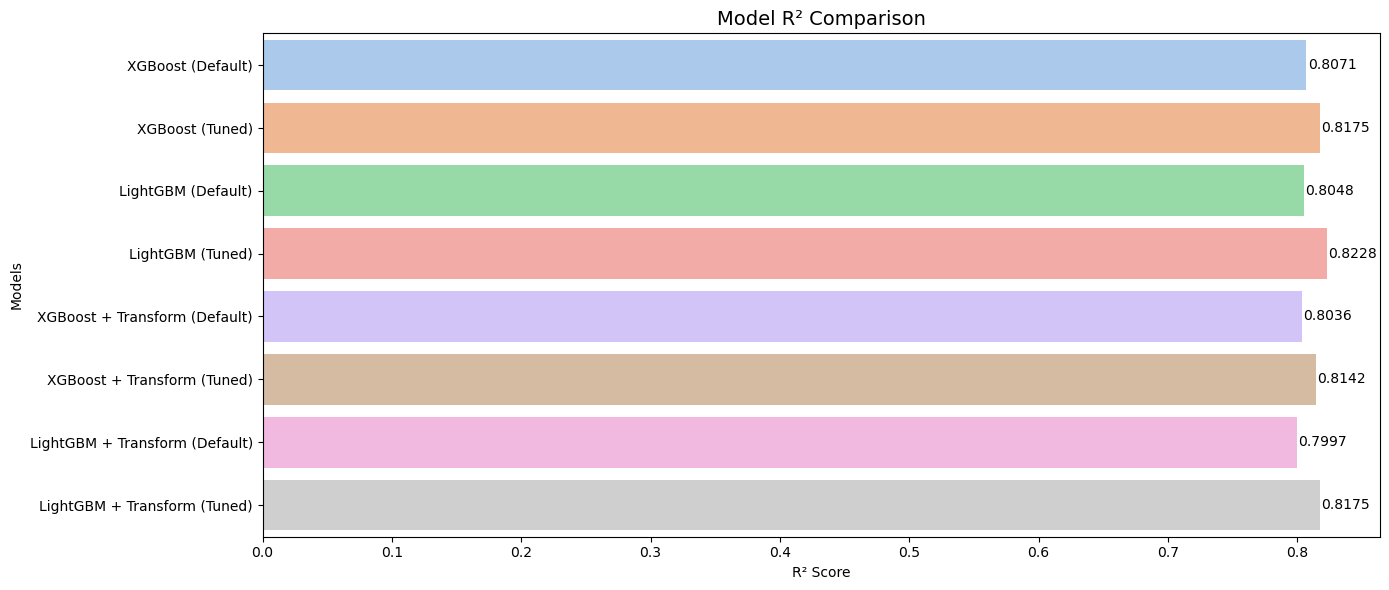

In [160]:
r2_scores = {
    "XGBoost (Default)": 0.8071,
    "XGBoost (Tuned)": 0.8175,
    "LightGBM (Default)": 0.8048,
    "LightGBM (Tuned)": 0.8228,
    "XGBoost + Transform (Default)": 0.8036,
    "XGBoost + Transform (Tuned)": 0.8142,
    "LightGBM + Transform (Default)": 0.7997,
    "LightGBM + Transform (Tuned)": 0.8175
}

result_r2 = pd.DataFrame(list(r2_scores.items()), columns=["Model", "R2"])

plt.figure(figsize=(14, 6))
sns.barplot(data=result_r2, x="R2", y="Model", palette="pastel")
plt.title("Model R² Comparison", fontsize=14)
plt.xlabel("R² Score")
plt.ylabel("Models")

for i, v in enumerate(result_r2["R2"]):
    plt.text(v + 0.001, i, f"{v:.4f}", color='black', va='center')

plt.tight_layout()
plt.savefig("images/model_r2_comparison.png", dpi=150, bbox_inches='tight')
plt.show()